In [1]:
import pandas as pd 
import numpy as np 


In [2]:
df = pd.read_csv("athlete_events.csv")
region_df = pd.read_csv("noc_regions.csv")

In [3]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
df.shape

(271116, 15)

### MEDAL TALLY

### Data Preprocess

In [5]:
df = df[df["Season"]=="Summer"]

In [6]:
df.shape # yaz dönemine ait veri çok 

(222552, 15)

In [7]:
region_df.head() 

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [8]:
df = df.merge(region_df,on="NOC",how="left") # df içindeki verileri koruyarak eşlesen noc değerlerine sahip region_df verileri ile birleştiriyoruz. 

In [9]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN
222551,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,NaN,Belarus,NaN


In [10]:
df['region'].unique()

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco',
       'Israel', 'Uruguay', 'Sweden', 'Sri Lanka', 'Armenia',
       'Ivory Coast', 'Kenya', 'Ben

In [11]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [12]:
df.duplicated().sum() # sütün üzerinde yinelenen değerlerin sayısını görüyoruz.

1385

In [13]:
df.drop_duplicates(inplace=True) # yinenelen değerleri atıyoruz. 

In [14]:
df["Medal"].value_counts()

Medal
Gold      11456
Bronze    11409
Silver    11212
Name: count, dtype: int64

In [15]:
df = pd.concat([df,pd.get_dummies(df["Medal"])],axis=1) # one hot encoder uyguluyoruz ve data ile birleştiyoruz 

In [16]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,False,False,False
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,False,False,False
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,False,False,False
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,False,True,False
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,False,False,False


In [17]:
df.groupby("NOC").sum()[["Gold","Silver","Bronze"]].sort_values("Gold",ascending=False).reset_index().head(25)

,NOC,Gold,Silver,Bronze
0,USA,2472,1333,1197
1,URS,832,635,596
2,GBR,635,729,620
3,GER,592,538,649
4,ITA,518,474,454
5,FRA,463,567,587
6,HUN,432,328,363
7,SWE,354,396,358
8,AUS,342,452,510
9,GDR,339,277,227


In [18]:
df[(df["NOC"]== "IND") & (df["Medal"]=="Gold")] 
# mesela  Shaukat Ali ve Richard James Allen aynı takım ve sporda altın madalya kazanmıs o ülke için o sporda tek altın madalya olarak saymalıyız 
# ona göre duplicate satırları temizlememiz lazım. 

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
4186,2699,Shaukat Ali,M,30.0,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,False,True,False
4190,2703,Syed Mushtaq Ali,M,22.0,165.0,61.0,India,IND,1964 Summer,1964,Summer,Tokyo,Hockey,Hockey Men's Hockey,Gold,India,NaN,False,True,False
4460,2864,Richard James Allen,M,25.0,172.0,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,False,True,False
4461,2864,Richard James Allen,M,30.0,172.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,False,True,False
4462,2864,Richard James Allen,M,34.0,172.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191759,117232,Dung Dung Sylvanus,M,31.0,160.0,62.0,India,IND,1980 Summer,1980,Summer,Moskva,Hockey,Hockey Men's Hockey,Gold,India,NaN,False,True,False
193964,118553,Carlyle Carrol Tapsell,M,23.0,182.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,False,True,False
193965,118553,Carlyle Carrol Tapsell,M,27.0,182.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,False,True,False
205949,125560,"Max ""Maxie"" Vaz",M,NaN,NaN,NaN,India,IND,1948 Summer,1948,Summer,London,Hockey,Hockey Men's Hockey,Gold,India,NaN,False,True,False


In [19]:
medal_tally = df.drop_duplicates(subset=["Team","NOC","Games","Year","City","Sport","Event","Medal"]) 
#Bu kod ile aynı takımın veya sporcunun aynı olayda birden fazla madalya kazanması durumunda bu girdiler bir kez kabul edilir.

In [20]:
medal_tally.head(10) 

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,False,False,False
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,False,False,False
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,False,False,False
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,False,True,False
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,False,False,False
5,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Netherlands,NaN,False,False,False
6,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NaN,Finland,NaN,False,False,False
7,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,NaN,Finland,NaN,False,False,False
8,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN,False,False,False
9,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN,False,False,False


In [21]:
medal_tally = medal_tally.groupby("NOC").sum()[["Gold","Silver","Bronze"]].sort_values("Gold",ascending=False).reset_index() 
# şimdi gerçek veriler ile örtüşen sayıları elde ettik 

In [22]:
medal_tally[(medal_tally["NOC"]== "IND")]

,NOC,Gold,Silver,Bronze
53,IND,9,7,12


In [23]:
medal_tally["total"] = medal_tally["Gold"] + medal_tally["Silver"] + medal_tally["Bronze"] 

In [24]:
medal_tally.head()

,NOC,Gold,Silver,Bronze,total
0,USA,1035,802,708,2545
1,URS,394,317,294,1005
2,GBR,278,317,300,895
3,GER,235,261,283,779
4,FRA,234,256,287,777


In [25]:
years = df["Year"].unique().tolist() # years için select box kodu

In [26]:
years.sort()

In [27]:
years

[1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [28]:
years.insert(0,"Overall")

In [29]:
country = np.unique(df["region"].dropna().values).tolist() # country için select box kodu

In [30]:
country.sort()

In [31]:
country

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guin

In [32]:
country.insert(0,"Overall")

In [33]:
country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [34]:
def fetch_medal_tally(df,year,country): # medal_tally select box için fonksiyon yıl ve şehire göre döngü getiriyor. 
    medal_df = df.drop_duplicates(subset=["Team","NOC","Games","Year","City","Sport","Event","Medal"]) 
    flag = 0
    if year =="Overall" and country == "Overall":
        temp_df = medal_df
    if year == "Overall" and country != "Overall":
        flag = 1
        temp_df = medal_df[medal_df["region"] == country]
    if year != "Overall" and country == "Overall":
        temp_df = medal_df[medal_df["Year"] == int(year)]
    if year != "Overall" and country != "Overall":
        temp_df = medal_df[(medal_df["Year"] == int(year))& (medal_df["region"] == country)]

    if flag == 1:
        x = temp_df.groupby("Year").sum()[["Gold","Silver","Bronze"]].sort_values("Year",ascending=True).reset_index() 
    else:   
        x = temp_df.groupby("region").sum()[["Gold","Silver","Bronze"]].sort_values("Gold",ascending=False).reset_index() 
    
    x["total"] = x["Gold"] + x["Silver"] + x["Bronze"] 

    print(x)
    

In [35]:
fetch_medal_tally(df,year="Overall",country="Turkey") # flag yazmadan önce overall yıllara göre ayrım yapmıyor her yılı görmek için yıl olarak gruplandırmalıyız.

    Year  Gold  Silver  Bronze  total
0   1906     0       0       0      0
1   1912     0       0       0      0
2   1924     0       0       0      0
3   1928     0       0       0      0
4   1932     0       0       0      0
5   1936     1       0       1      2
6   1948     6       4       2     12
7   1952     2       0       1      3
8   1956     3       2       2      7
9   1960     7       2       0      9
10  1964     2       3       1      6
11  1968     2       0       0      2
12  1972     0       1       0      1
13  1976     0       0       0      0
14  1984     0       0       3      3
15  1988     1       1       0      2
16  1992     2       2       2      6
17  1996     4       1       1      6
18  2000     3       0       2      5
19  2004     3       3       5     11
20  2008     1       3       3      7
21  2012     2       2       1      5
22  2016     1       3       4      8


In [36]:
fetch_medal_tally(df,year="Overall",country="Turkey") # görmek istediğimiz şekil böyle. 

    Year  Gold  Silver  Bronze  total
0   1906     0       0       0      0
1   1912     0       0       0      0
2   1924     0       0       0      0
3   1928     0       0       0      0
4   1932     0       0       0      0
5   1936     1       0       1      2
6   1948     6       4       2     12
7   1952     2       0       1      3
8   1956     3       2       2      7
9   1960     7       2       0      9
10  1964     2       3       1      6
11  1968     2       0       0      2
12  1972     0       1       0      1
13  1976     0       0       0      0
14  1984     0       0       3      3
15  1988     1       1       0      2
16  1992     2       2       2      6
17  1996     4       1       1      6
18  2000     3       0       2      5
19  2004     3       3       5     11
20  2008     1       3       3      7
21  2012     2       2       1      5
22  2016     1       3       4      8


In [37]:
fetch_medal_tally(df,year="2016",country="Overall")

         region  Gold  Silver  Bronze  total
0           USA    46      37      38    121
1            UK    27      23      17     67
2         China    26      18      26     70
3        Russia    19      17      20     56
4       Germany    17      10      15     42
..          ...   ...     ...     ...    ...
198     Ireland     0       2       0      2
199      Israel     0       0       2      2
200    Kiribati     0       0       0      0
201  Kyrgyzstan     0       0       0      0
202    Zimbabwe     0       0       0      0

[203 rows x 5 columns]


In [38]:
fetch_medal_tally(df,year="2016",country="Turkey") # fonksiyon kontrolü  

   region  Gold  Silver  Bronze  total
0  Turkey     1       3       4      8


In [39]:
medal_df =  df.drop_duplicates(subset=["Team","NOC","Games","Year","City","Sport","Event","Medal"]) 

In [40]:
medal_df[(medal_df["Year"] == 2016)& (medal_df["region"] == "India")]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
1015,663,Sharath Kamal Achanta,M,34.0,186.0,85.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Table Tennis,Table Tennis Men's Singles,NaN,India,NaN,False,False,False
7065,4523,Seema Antil,F,33.0,182.0,92.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Discus Throw,NaN,India,NaN,False,False,False
8713,5562,Aditi Ashok,F,18.0,173.0,57.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Golf,Golf Women's Individual,NaN,India,NaN,False,False,False
9202,5868,Manu Attri,M,23.0,172.0,73.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Badminton,Badminton Men's Doubles,NaN,India,NaN,False,False,False
10070,6427,Lalita Shivaji Babar,F,27.0,166.0,50.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Women's 3,000 metres Steeplechase",NaN,India,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182260,111467,Sathish Kumar Sivalingam,M,24.0,175.0,77.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Men's Middleweight,NaN,India,NaN,False,False,False
195568,119515,Shiva Thapa,M,22.0,169.0,56.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Boxing,Boxing Men's Bantamweight,NaN,India,NaN,False,False,False
198042,120871,Sandeep Tomar,M,25.0,168.0,61.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Featherweight, Freestyle",NaN,India,NaN,False,False,False
216942,132143,Vikas Krishan Yadav,M,24.0,177.0,69.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Boxing,Boxing Men's Middleweight,NaN,India,NaN,False,False,False


In [41]:
medal_df[medal_df["Year"] == 2016]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
34,22,Andreea Aanei,F,22.0,170.0,125.0,Romania,ROU,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN,Romania,NaN,False,False,False
77,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Individual All-Around,NaN,Spain,NaN,False,False,False
78,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Floor Exercise,NaN,Spain,NaN,False,False,False
79,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Parallel Bars,NaN,Spain,NaN,False,False,False
80,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Horizontal Bar,NaN,Spain,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222327,135410,Zaidatul Husniah Zulkifli,F,22.0,156.0,40.0,Malaysia,MAS,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 100 metres,NaN,Malaysia,NaN,False,False,False
222346,135421,Goretti Alejandra Zumaya Flores,F,19.0,165.0,65.0,Mexico,MEX,2016 Summer,2016,Summer,Rio de Janeiro,Shooting,"Shooting Women's Air Rifle, 10 metres",NaN,Mexico,NaN,False,False,False
222383,135453,Kelita Zupancic,F,26.0,169.0,70.0,Canada,CAN,2016 Summer,2016,Summer,Rio de Janeiro,Judo,Judo Women's Middleweight,NaN,Canada,NaN,False,False,False
222407,135478,Henrikas ustautas,M,22.0,192.0,96.0,Lithuania,LTU,2016 Summer,2016,Summer,Rio de Janeiro,Canoeing,"Canoeing Men's Canadian Singles, 200 metres",NaN,Lithuania,NaN,False,False,False


In [42]:
medal_df[medal_df["region"] == "India"]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
436,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN,False,False,False
437,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN,False,False,False
790,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN,False,False,False
791,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN,False,False,False
792,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216942,132143,Vikas Krishan Yadav,M,24.0,177.0,69.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Boxing,Boxing Men's Middleweight,NaN,India,NaN,False,False,False
216985,132177,Mohammad Anas Yahiya,M,21.0,177.0,69.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 400 metres,NaN,India,NaN,False,False,False
218411,133029,"Thyadathuvilla Chandrapillai ""T. C."" Yohannan",M,29.0,174.0,62.0,India,IND,1976 Summer,1976,Summer,Montreal,Athletics,Athletics Men's Long Jump,NaN,India,NaN,False,False,False
222416,135480,Geeta Zutshi,F,23.0,167.0,51.0,India,IND,1980 Summer,1980,Summer,Moskva,Athletics,Athletics Women's 800 metres,NaN,India,NaN,False,False,False


In [43]:
medal_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,False,False,False
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,False,False,False
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,False,False,False
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,False,True,False
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222528,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver,Russia,NaN,False,False,True
222530,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze,Russia,NaN,True,False,False
222536,135556,Bogusaw Stanisaw Zychowicz,M,19.0,189.0,80.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 100 metres Butterfly,NaN,Poland,NaN,False,False,False
222537,135556,Bogusaw Stanisaw Zychowicz,M,19.0,189.0,80.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 200 metres Butterfly,NaN,Poland,NaN,False,False,False


## OVERALL ANALYSIS

In [44]:
df["Year"].unique() # olimpiyatlar her 4 yılda bir yapılmasına karşın 1906 da ara bir olimpiyat olmuştur 

array([1992, 2012, 1920, 1900, 1932, 1952, 2000, 1996, 1912, 1924, 1948,
       2008, 2016, 2004, 1984, 1968, 1972, 1988, 1936, 1956, 1960, 1928,
       1976, 1980, 1964, 1906, 1904, 1908, 1896])

In [45]:
df["Year"].unique().shape[0]-1 # eksik olan yılı 1906 çıkardık 

28

In [46]:
df["City"].unique().shape[0] # doğru şehir sayısı

23

In [47]:
df["Sport"].unique().shape[0]

52

In [48]:
df["Event"].unique().shape[0]

651

In [49]:
df["Name"].unique().shape[0]

116122

In [50]:
df["region"].unique().shape[0]

206

In [51]:
nations_over_time = df.drop_duplicates(["Year","region"])["Year"].value_counts().reset_index().sort_values("Year")

In [52]:
nations_over_time.rename(columns={"Year":"Edition","count":"No of Countries"},inplace=True)

In [53]:
import plotly.express as px

fig = px.line(nations_over_time,x="Edition",y="No of Countries") 
fig.show()
# 1980 yılında ani düşüş Sovyetler Birliğinin Afganistanı işgal etmesiyle , ABD tarafından Boykot edilmesi nedeniyle olmuştur.


In [54]:
df.drop_duplicates(["Year","Event"])["Year"].value_counts().reset_index().sort_values("Year")

,Year,count
28,1896,43
26,1900,90
25,1904,95
27,1906,74
23,1908,109
24,1912,107
14,1920,158
20,1924,131
22,1928,122
21,1932,131


In [55]:
x = df.drop_duplicates(["Year","Sport","Event"])

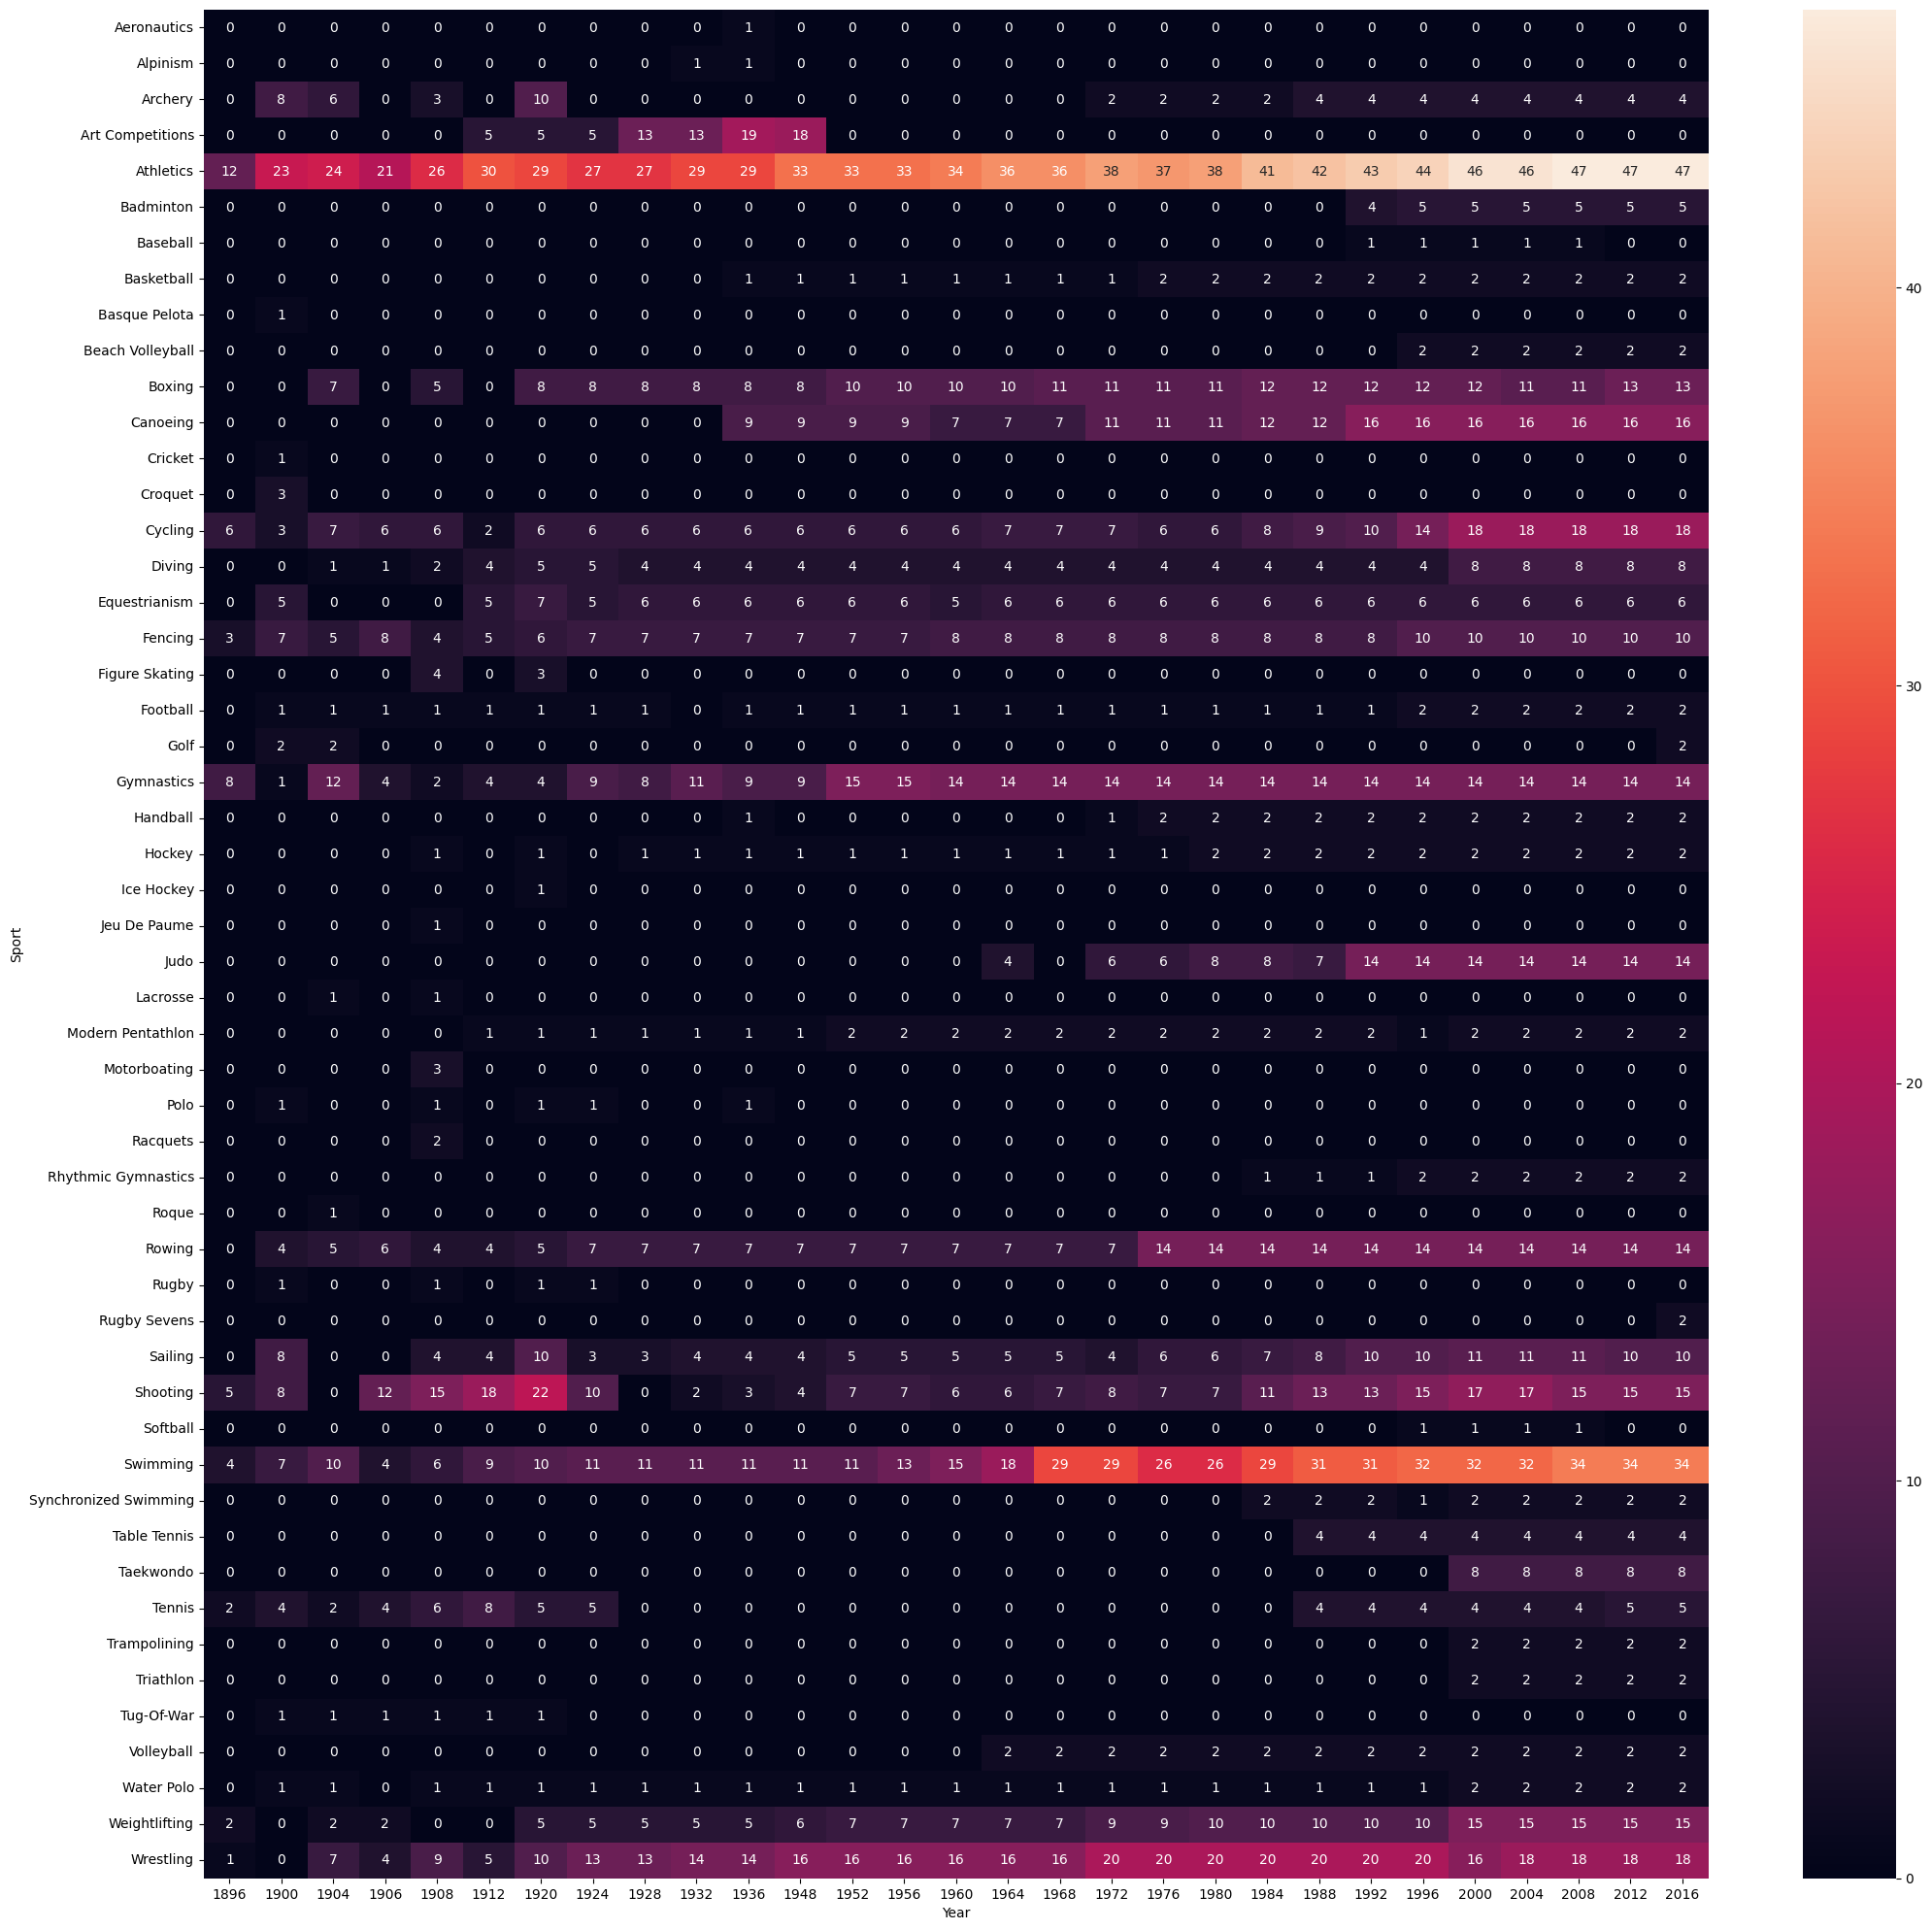

In [56]:
# headmap 
import seaborn as sns
import matplotlib.pyplot as plt 
plt.figure(figsize=(25, 25))
sns.heatmap(x.pivot_table(index="Sport", columns="Year", values="Event", aggfunc="count").fillna(0).astype("int"), annot=True)
plt.show() 

In [57]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,False,False,False
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,False,False,False
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,False,False,False
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,False,True,False
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN,False,False,False
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN,False,False,False
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,False,False,False
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,False,False,False


In [58]:
def most_successful(df,sport): 
    temp_df = df.dropna(subset=["Medal"])

    if sport != 'Overall':
        temp_df = temp_df[temp_df["Sport"] == sport]

    x = temp_df["Name"].value_counts().reset_index().head(15).merge(df,left_on="Name",right_on="Name",how = "left")[["Name","count","Sport","region"]].drop_duplicates("Name")
    x.rename(columns={"count":"Medals"},inplace=True)
    return x
# en başarıları sporcuları buluyoruz ve orijinal veri setimizi olan df ile istediğimiz bilgilerini alıp tek tablo olarak fonksiyon içinde yazıyoruz.


In [59]:
most_successful(df,"Overall")

,Name,Medals,Sport,region
0,"Michael Fred Phelps, II",28,Swimming,USA
30,Larysa Semenivna Latynina (Diriy-),18,Gymnastics,Russia
49,Nikolay Yefimovich Andrianov,15,Gymnastics,Russia
73,Borys Anfiyanovych Shakhlin,13,Gymnastics,Russia
97,Takashi Ono,13,Gymnastics,Japan
130,Edoardo Mangiarotti,13,Fencing,Italy
144,"Dara Grace Torres (-Hoffman, -Minas)",12,Swimming,USA
157,Aleksey Yuryevich Nemov,12,Gymnastics,Russia
178,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12,Swimming,USA
195,Birgit Fischer-Schmidt,12,Canoeing,Germany


In [60]:
most_successful(df,"Football") 

,Name,Medals,Sport,region
0,Christie Patricia Pearce-Rampone,4,Football,USA
4,Kristine Marie Lilly (-Heavey),3,Football,USA
7,Heather Blaine Mitts (-Feeley),3,Football,USA
10,Brandi Denise Chastain,3,Football,USA
13,Dezs Novk,3,Football,Hungary
16,Ariane Hingst,3,Football,Germany
19,"Kathryn Michele ""Kate"" Sobrero-Markgraf",3,Football,USA
22,Niels Christian Oscar Nielsen (-Nrland),3,Football,Denmark
25,Heather Ann OReilly (-Werry),3,Football,USA
28,Charles von Buchwald,3,Football,Denmark


## COUNTRY WISE

In [61]:
## ülkeye göre madalya sayıları line plot
## hangi ülkeler heatmap grafiği iyi
## top 10 athletes

In [62]:
## ülkeye göre madalya sayıları line plot
temp_df = df.dropna(subset=["Medal"])
temp_df.drop_duplicates(subset=["Team","NOC","Games","Year","City","Sport","Event","Medal"],inplace=True)


/var/folders/xp/gs5jj49d2n1_y881z2h8pqmm0000gn/T/ipykernel_22441/4217128849.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [63]:
new_df = temp_df[temp_df["region"] == "Turkey"]
final_df = new_df.groupby("Year").count()["Medal"].reset_index()

In [64]:
final_df.head(20)

,Year,Medal
0,1936,2
1,1948,12
2,1952,3
3,1956,7
4,1960,9
5,1964,6
6,1968,2
7,1972,1
8,1984,3
9,1988,2


In [65]:
import plotly.express as px

fig = px.line(final_df,x="Year",y="Medal") 
fig.show()

<Axes: xlabel='Year', ylabel='Sport'>

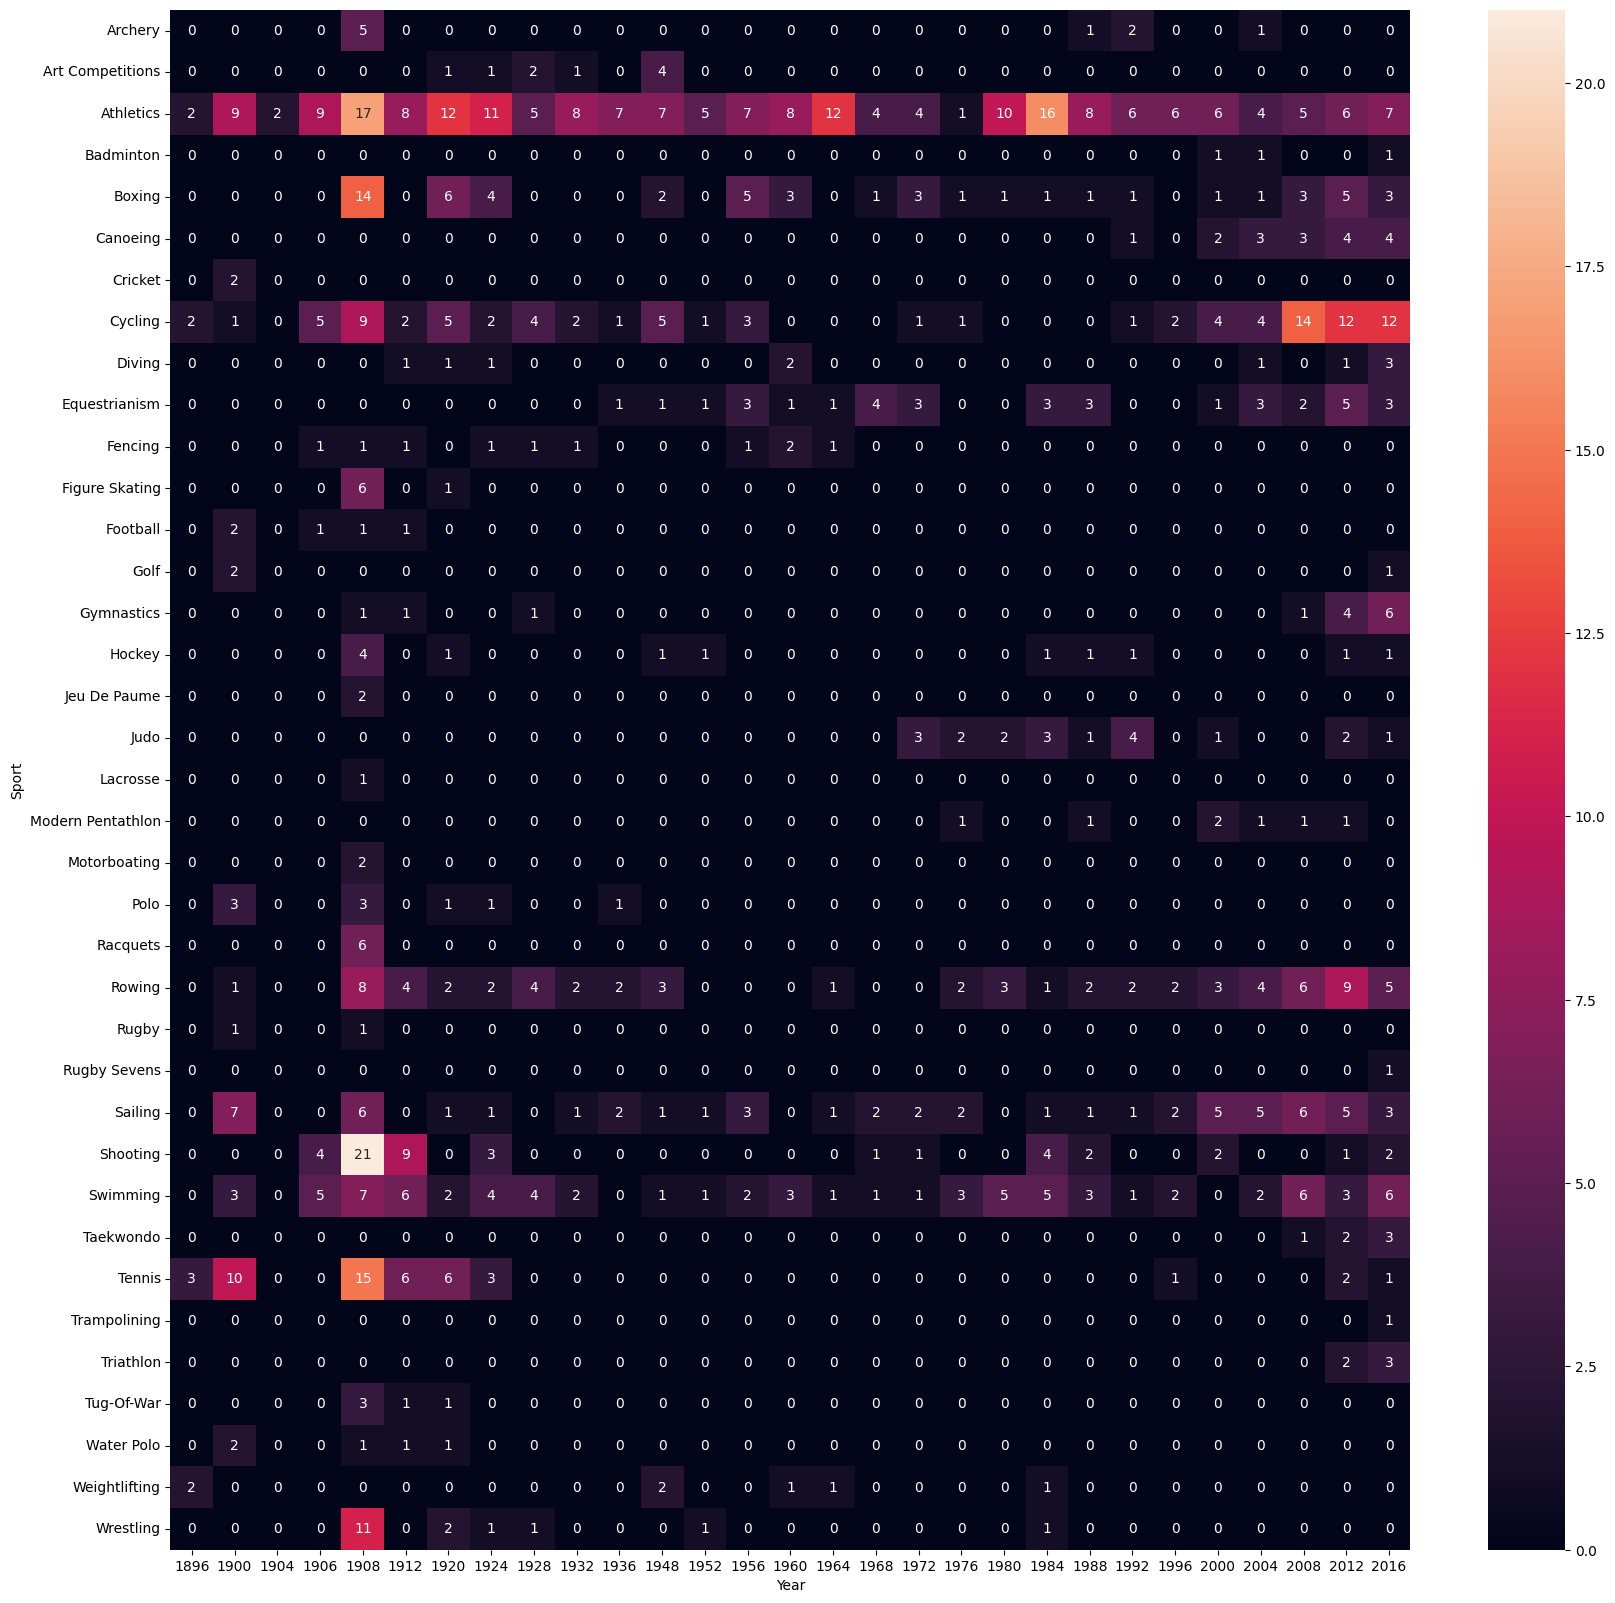

In [66]:
## hangi ülkeler heatmap grafiği iyi
new_df = temp_df[temp_df["region"] == "UK"]
plt.figure(figsize=(20,20))
sns.heatmap(new_df.pivot_table(index="Sport",columns="Year",values="Medal",aggfunc="count").fillna(0),annot=True)

In [67]:
### top 10 athletes
def most_successful(df,country): 
    temp_df = df.dropna(subset=["Medal"])

    
    temp_df = temp_df[temp_df["region"] == country] # istediğimiz ülkeye göre filtreleme yapıyoruz
    

    x = temp_df["Name"].value_counts().reset_index().head(15).merge(df,left_on="Name",right_on="Name",how = "left")[["Name","count","Sport"]].drop_duplicates("Name")
    x.rename(columns={"count":"Medals"},inplace=True)
    return x

In [68]:
most_successful(df,"Turkey")

,Name,Medals,Sport
0,Hamit Kaplan,3,Wrestling
5,Halil Mutlu,3,Weightlifting
9,Naim Sleymanolu,3,Weightlifting
13,Mithat Bayrak,2,Wrestling
16,smail Oan,2,Wrestling
18,Ahmet Ayk,2,Wrestling
20,Mehmet Akif Pirim,2,Wrestling
22,Ahmet Kirei (Mersinli-),2,Wrestling
24,Nur Tatar,2,Taekwondo
26,Rza Kayaalp,2,Wrestling


## ATHLETE WİSE ANALYSIS

In [69]:
## athlete yaşlara göre madalya dağılımı

In [70]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,False,False,False
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,False,False,False
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,False,False,False
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,False,True,False
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN,False,False,False
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN,False,False,False
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,False,False,False
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,False,False,False


In [71]:
import plotly.figure_factory as ff 
atlhete_df = df.drop_duplicates(subset=["Name","region"])

In [72]:
x1 = atlhete_df["Age"].dropna()
x2 = atlhete_df[atlhete_df["Medal"]=="Gold"]["Age"].dropna()
x3 = atlhete_df[atlhete_df["Medal"]=="Silver"]["Age"].dropna()
x4 = atlhete_df[atlhete_df["Medal"]=="Bronze"]["Age"].dropna()


In [73]:
fig = ff.create_distplot([x1,x2,x3,x4],["Overall Age","Gold Medalist","Silver Medalist","Bronze Medalist"],show_hist=False,show_rug=False)
fig.show()


In [74]:
df["Sport"].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [75]:
famous_sport = ['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing','Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving','Tennis','Table Tennis','Golf','Ice Hockey']

In [76]:
# boy ve yaş oranına göre madalya dağılım grafiği 
atlhete_df["Medal"].fillna("No Medal",inplace=True) 

<Axes: xlabel='Weight', ylabel='Height'>

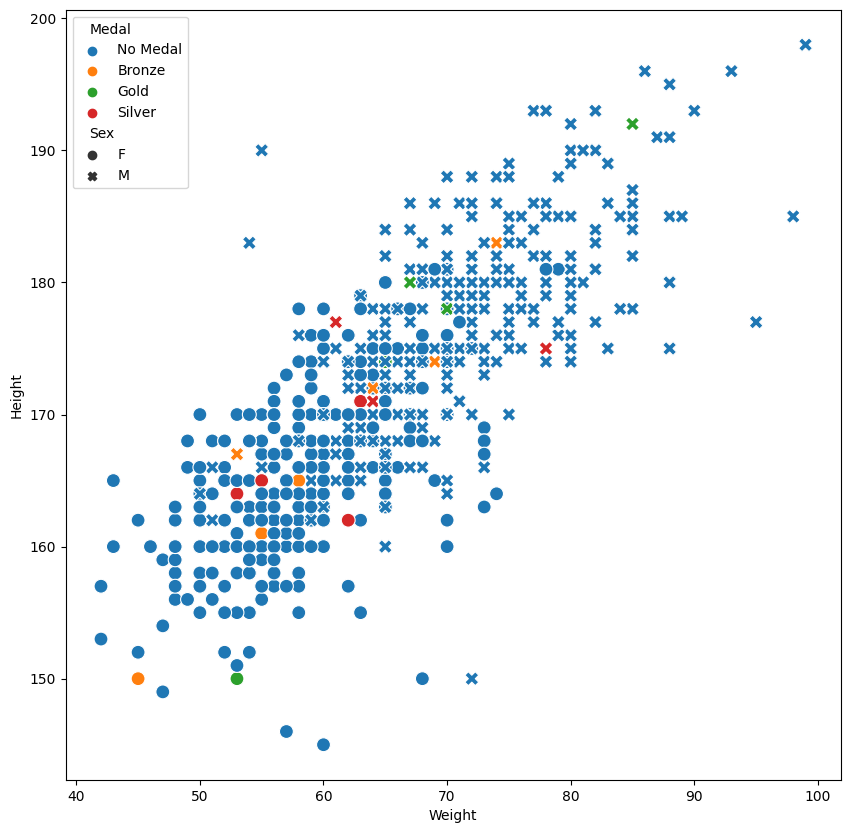

In [85]:
plt.figure(figsize=(10,10))
temp_df = atlhete_df[atlhete_df["Sport"] == 'Table Tennis']
sns.scatterplot(x="Weight", y="Height", data=temp_df,hue=temp_df["Medal"],style=temp_df["Sex"],s=100) 

In [101]:
# yıllara göre erkek kadın line grafiği 
men = atlhete_df[atlhete_df["Sex"] == "M"].groupby("Year").count()["Name"].reset_index()
women = atlhete_df[atlhete_df["Sex"] == "F"].groupby("Year").count()["Name"].reset_index()

In [102]:
final = men.merge(women,on="Year",how="left")
final.rename(columns={"Name_x":"Male", "Name_y":"Female"},inplace=True)

In [104]:
final.fillna(0,inplace=True)

In [105]:
final

,Year,Male,Female
0,1896,174,0.0
1,1900,1181,23.0
2,1904,629,6.0
3,1906,759,6.0
4,1908,1772,44.0
5,1912,1978,53.0
6,1920,2280,73.0
7,1924,2535,132.0
8,1928,2342,285.0
9,1932,1382,162.0


In [106]:
fig = px.line(final,x="Year",y =["Male", "Female"])
fig.show()